# Infrastructure for experimentation
- Config file

# Model 
- Pytorch Module -> model architecture
- Brainstorm hyperparameters to be tuned

## Imports & Consts

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mne, os, csv
# Initialize weights and bases (install it if necessary)
import wandb
import optuna
import torch.optim as optim


## Data Collection & Preprocessing

In [2]:
all_data = pd.DataFrame()

identify_if_file_is_continuous = lambda filename: "cnt" in filename
identify_if_file_is_marker = lambda filename: "mkr" in filename

for filename in os.listdir("./data/"):
    if identify_if_file_is_continuous(filename):
        with open("./data/" + filename, "r") as f:
            reader = csv.reader(f, delimiter="\t")
            data = pd.Series([np.array(z, dtype=float) for z in list(reader)], dtype=float)
            data.name = "_".join(filename.split("_")[1:3])
            if all_data is None:
                all_data = data
                continue
            all_data = pd.concat([all_data, data], axis=1)
all_data

,eval_ds1g,eval_ds1a,calib_ds1a,calib_ds1g,calib_ds1b,calib_ds1e,eval_ds1b,eval_ds1c,eval_ds1d,calib_ds1d,eval_ds1e,calib_ds1f,eval_ds1f,calib_ds1c
0,"(20.0, 38.0, 47.0, 41.0, 17.0, 30.0, 25.0, 32....","(-4.0, -9.0, -22.0, -21.0, -4.0, -13.0, -8.0, ...","(-3.0, -3.0, -3.0, -8.0, -4.0, -5.0, -4.0, 1.0...","(47.0, 61.0, 33.0, 35.0, 47.0, 50.0, 58.0, 62....","(-105.0, -52.0, -37.0, -38.0, -70.0, -38.0, -7...","(21.0, 20.0, 29.0, 27.0, 30.0, 32.0, 24.0, 30....","(29.0, 49.0, 27.0, 33.0, 43.0, 35.0, 53.0, 60....","(2.0, -1.0, 2.0, 4.0, 0.0, 1.0, 4.0, 3.0, 2.0,...","(0.0, 2.0, -10.0, -2.0, -13.0, -10.0, -15.0, -...","(-36.0, -138.0, -50.0, -34.0, -24.0, -16.0, -5...","(-38.0, -28.0, -66.0, -71.0, -78.0, -64.0, -53...","(-40.0, -15.0, -18.0, -28.0, -41.0, -11.0, -30...","(-67.0, -28.0, -34.0, -49.0, -49.0, -29.0, -35...","(99.0, 101.0, 67.0, 60.0, 58.0, 71.0, 115.0, 1..."
1,"(152.0, 295.0, 373.0, 321.0, 113.0, 235.0, 184...","(-29.0, -75.0, -171.0, -171.0, -24.0, -105.0, ...","(-25.0, -21.0, -26.0, -63.0, -26.0, -38.0, -28...","(425.0, 540.0, 309.0, 325.0, 428.0, 452.0, 516...","(-917.0, -456.0, -335.0, -336.0, -615.0, -333....","(90.0, 86.0, 124.0, 112.0, 127.0, 139.0, 102.0...","(305.0, 472.0, 238.0, 268.0, 351.0, 279.0, 424...","(12.0, -5.0, 13.0, 31.0, 0.0, 8.0, 26.0, 22.0,...","(7.0, 7.0, -33.0, -6.0, -43.0, -37.0, -47.0, -...","(-203.0, -774.0, -280.0, -190.0, -137.0, -90.0...","(-124.0, -90.0, -210.0, -222.0, -247.0, -205.0...","(-339.0, -119.0, -152.0, -233.0, -352.0, -85.0...","(-557.0, -219.0, -279.0, -411.0, -409.0, -232....","(719.0, 754.0, 498.0, 451.0, 447.0, 545.0, 851..."
2,"(333.0, 704.0, 835.0, 709.0, 226.0, 528.0, 399...","(-50.0, -168.0, -352.0, -371.0, -28.0, -222.0,...","(-34.0, -15.0, -52.0, -97.0, -22.0, -44.0, -22...","(1068.0, 1325.0, 802.0, 836.0, 1085.0, 1136.0,...","(-2198.0, -1086.0, -822.0, -826.0, -1473.0, -8...","(136.0, 134.0, 187.0, 168.0, 194.0, 211.0, 155...","(835.0, 1244.0, 557.0, 604.0, 784.0, 607.0, 91...","(30.0, -7.0, 24.0, 66.0, 2.0, 20.0, 58.0, 49.0...","(11.0, 8.0, -45.0, -11.0, -60.0, -52.0, -55.0,...","(-384.0, -1463.0, -517.0, -360.0, -265.0, -182...","(-154.0, -106.0, -253.0, -261.0, -294.0, -244....","(-822.0, -301.0, -345.0, -557.0, -835.0, -197....","(-1297.0, -491.0, -632.0, -957.0, -943.0, -522...","(1664.0, 1804.0, 1172.0, 1091.0, 1120.0, 1317...."
3,"(350.0, 807.0, 804.0, 687.0, 229.0, 554.0, 416...","(-11.0, -145.0, -287.0, -328.0, 14.0, -194.0, ...","(24.0, 49.0, -30.0, 6.0, 59.0, 48.0, 60.0, 129...","(1192.0, 1433.0, 930.0, 961.0, 1214.0, 1260.0,...","(-2270.0, -1120.0, -880.0, -883.0, -1523.0, -8...","(112.0, 117.0, 152.0, 138.0, 164.0, 174.0, 135...","(1004.0, 1437.0, 553.0, 637.0, 790.0, 600.0, 8...","(41.0, 6.0, 35.0, 75.0, 12.0, 28.0, 64.0, 58.0...","(4.0, 8.0, -48.0, -18.0, -58.0, -51.0, -43.0, ...","(-354.0, -1381.0, -460.0, -337.0, -249.0, -189...","(-124.0, -85.0, -200.0, -201.0, -224.0, -187.0...","(-885.0, -359.0, -348.0, -593.0, -875.0, -217....","(-1311.0, -487.0, -620.0, -975.0, -948.0, -522...","(2081.0, 2341.0, 1478.0, 1424.0, 1482.0, 1634...."
4,"(383.0, 750.0, 703.0, 616.0, 259.0, 540.0, 415...","(-22.0, -139.0, -264.0, -309.0, -25.0, -208.0,...","(44.0, 37.0, -15.0, 54.0, 95.0, 80.0, 73.0, 12...","(1052.0, 1245.0, 832.0, 865.0, 1060.0, 1101.0,...","(-1908.0, -945.0, -750.0, -744.0, -1286.0, -70...","(113.0, 123.0, 153.0, 135.0, 168.0, 173.0, 136...","(934.0, 1227.0, 531.0, 701.0, 778.0, 610.0, 86...","(57.0, 26.0, 62.0, 92.0, 32.0, 44.0, 74.0, 70....","(9.0, 15.0, -55.0, -18.0, -64.0, -56.0, -47.0,...","(-302.0, -1232.0, -396.0, -293.0, -203.0, -158...","(-161.0, -112.0, -236.0, -237.0, -260.0, -217....","(-718.0, -276.0, -282.0, -473.0, -701.0, -135....","(-1062.0, -371.0, -501.0, -792.0, -760.0, -410...","(2334.0, 2579.0, 1622.0, 1544.0, 1589.0, 1693...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246965,NaN,NaN,NaN,NaN,NaN,NaN,"(1183.0, 1000.0, 805.0, 768.0, 835.0, 597.0, 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
246966,NaN,NaN,NaN,NaN,NaN,NaN,

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def convert_pandas_series_to_numpy(series: pd.Series):
    print([type(s) for s in series.tolist()[:10]])
    return np.array([s for s in series.tolist() if type(s) == tuple or not np.isnan(s)])

data = all_data["calib_ds1a"]


# Do some data transformations oh yeah
data = convert_pandas_series_to_numpy(data)
data = StandardScaler().fit_transform(data)
data = MinMaxScaler().fit_transform(data)


[<class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>, <class 'tuple'>]


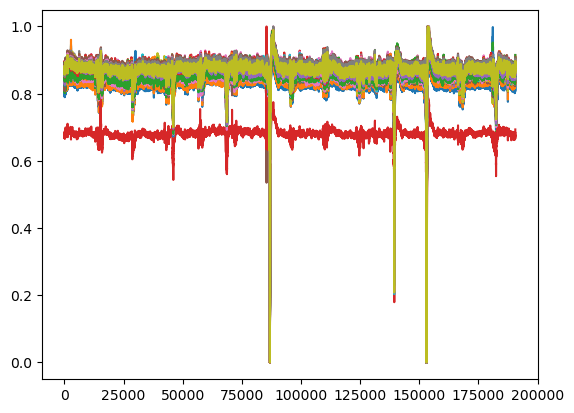

## Model Architecture
**Todos**
 - Get the basic-ass transformer architecture working
 - Create a generate_model function that takes in some parameters and builds a model by using modular pieces and changing the architecture (will be used for hyperparameter tuning)

## Training

In [13]:
NUM_EPOCHS = 10

def objective(trial):

    model = generate_model() # add more params here 

    # Learning rate hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    

    # start a new wandb run to track this script
    wandb.init(
        # set the wandb project where this run will be logged
        project="universum_model_development",
        
        # track hyperparameters and run metadata
        config={
        "learning_rate": learning_rate,
        "optimizer" : "Adam",
        "epochs": NUM_EPOCHS,
        }
    )

    # Run individual epochs and figure out when optuna should prune the trials
    for epoch in range(NUM_EPOCHS):
        model.partial_fit() # add more params here

        current_performance = model.eval() # add more params here

        trial.report(current_performance, epoch)

        if trial.should_prune():
            raise optuna.TrialPruned()

    final_metric = model.eval() # add more params here

    wandb.finish()

    return final_metric


study = optuna.create_study(
    sampler=optuna.samplers.TPESampler(),
    pruner=optuna.pruners.HyperbandPruner(),
    study_name="test_0",
    storage="sqlite:///test.db",
    load_if_exists=False,
    )  # Create a new study.

study.optimize(objective, n_trials=100)  # Invoke optimization of the objective function.

print(study.best_trial)
print(study.best_params)

[I 2023-11-15 21:26:43,426] A new study created in RDB with name: test_0
[W 2023-11-15 21:26:43,471] Trial 0 failed with parameters: {} because of the following error: NameError("name 'generate_model' is not defined").
Traceback (most recent call last):
  File "/home/matthandzel/anaconda3/lib/python3.9/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "/tmp/ipykernel_553407/4238679314.py", line 5, in objective
    model = generate_model() # add more params here
NameError: name 'generate_model' is not defined
[W 2023-11-15 21:26:43,473] Trial 0 failed with value None.


NameError: name 'generate_model' is not defined